# Testing Cartopy

Cartopy is a popular plotting library and depends on `geos` and `proj` libraries and therefore need to be linked against these. Currently it is possible to install cartopy in any version you want, using the provided module libraries:
 - `geos/3.8.1-gcc-8.5.0` or similar using gcc
 - `proj/8.1.0-gcc-8.5.0` or similar using gcc
 - `proj/7.1.0-gcc-8.5.0` or similar using gcc using cartopy <0.20
 
However, there are still some issues with Cartopy. Please note that its version is `0.XX` that means development and not a stable release.

In [1]:
!module --no-pager list

Currently Loaded Modulefiles:
 1) anaconda3/2021.05-gcc-8.5.0   3) proj/8.1.0-gcc-8.5.0  
 2) geos/3.8.1-gcc-8.5.0         


In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.crs as ccrs

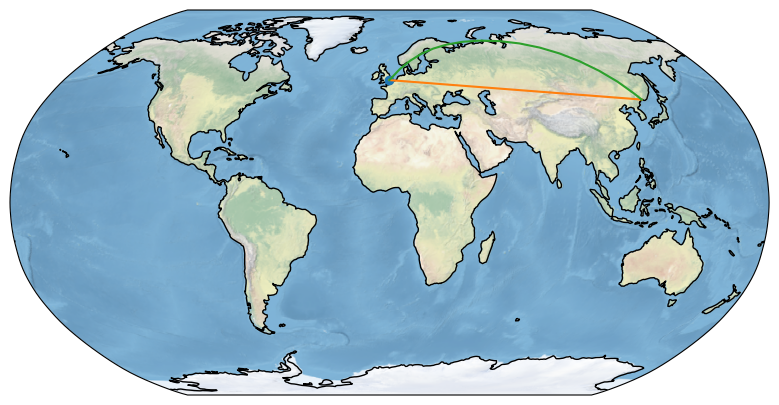

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

Write the necessary modules into the kernel launcher configuration file:
`~/load_modules_into_jupyter.conf` 

If that files is written just now. restart the kernel otherwise the pip install will fail.

In [2]:
%%writefile ~/load_modules_into_jupyter.conf
geos
proj/7.1.0-gcc-8.3.1-xcjaco5

Overwriting /jetfs/home/mblaschek/load_modules_into_jupyter.conf


Execute the local `--user` install of cartopy into your home directory:

In [3]:
# Cartopy 0.20.0 with shapely
!pip install --user cartopy==0.20.0 shapely==1.7.1
# Cartopy 0.20.2 with shapely 1.8.0 (does not work with 1.8.1 or 1.8.2)
# !pip install --user shapely==1.8.0 cartopy

  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 102.1 MB/s eta 0:00:01
     |████████████████████████████████| 219 kB 103.9 MB/s eta 0:00:01
  Created wheel for cartopy: filename=Cartopy-0.20.0-cp38-cp38-linux_x86_64.whl size=10980651 sha256=c63e7fc196492e2db81029ed2af8d2f3fb1ba3fa2129e8e4c59d6000c2a5a591
  Stored in directory: /home/spack/.cache/pip/wheels/f2/b9/4d/cf1a107ee01bae40000f27ed744a269bc251223b241fd71117
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37262 sha256=85f688d164ea994b5d66b0fb71c3fc0c78a6a9d74fdef026991ef2fca114c18e
  Stored in directory: /home/spack/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built cartopy pyshp


**When the installation is completed, restart the current kernel and try to plot again.**